In [1]:
import seml
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd


In [2]:
output_dir = "figures"

# CPU

In [3]:
results = seml.get_results('cpu_initializer', to_data_frame=True)

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

In [7]:
results["config.initializer"].unique()

array([None, 'default', 'gaussian', 'random', 'rank2', 'k-means'],
      dtype=object)

In [31]:
def adapt_model(x):
    if x["config.model"] == "WOT":
        return "WOT"
    rank = x["config.rank"]
    gamma = x["config.gamma"]
    if not pd.isna(x["config.batch_size"]):
        if rank==-1:
            if x["config.initializer"] == "gaussian":
                return "moscot_online_gaussian_init"
            elif x["config.initializer"] == None:
                return "moscot_online"
            elif x["config.initializer"] == "default":
                return "moscot_online_default"
            raise KeyError
    if rank > -1:
        if x["config.initializer"] == "random":
            return f"moscot_{rank}_{gamma}_random"
        if x["config.initializer"] == "rank2":
            return f"moscot_{rank}_{gamma}_rank2"
        if x["config.initializer"] == "k-means":
            return f"moscot_{rank}_{gamma}_kmeans"
        raise KeyError
    if rank==-1:
        return "moscot"
    return f"moscot_{rank}_{gamma}"
    
results["model_adapted"] = results.apply(lambda x: adapt_model(x), axis=1)

In [32]:
def adapt_error(x):
    if isinstance(x['result.error'], np.ndarray):
        return x['result.error'][0]
    return x['result.error']

results["error_adapted"] = results.apply(lambda x: adapt_error(x), axis=1)

In [33]:
dic = {}
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_1024.h5ad"] = 1024+256
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_2048.h5ad"] = 2048+512
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_4096.h5ad"] = 4096+1024
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_8192.h5ad"] = 8192+2048
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_16384.h5ad"] = 16384+4096
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_32768.h5ad"] = 32768+8192
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_65536.h5ad"] = 65536+16384
dic["/lustre/groups/ml01/datasets/projects/2022-02-25_moscot/moscot-lineage_reproducibility/notebooks/analysis_notebooks/tedsim/data_generation/adatas_large/adata_131072.h5ad"] = 131072+32768

In [34]:
import pandas as pd
results["n_cells"] = results["config.fpath"].map(dic)

In [35]:
import seaborn as sns
sns.set_style("whitegrid", {'xtick.direction': 'out', 'xtick.major.size': 5.0, 'xtick.minor.size': 5.0,
    'ytick.color': '.15', 'ytick.direction': 'out', 'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 
                           'font.family': ['DejaVu Sans'], 'font.scale': 1})
palette = 'deep'

In [39]:
labels_dict = {}

labels_dict["WOT"] = "WOT"
labels_dict["moscot"] = "moscot"
labels_dict["moscot_online"] = "moscot online"
labels_dict['moscot_50.0_10.0_random'] = "moscot, r50, random"
labels_dict['moscot_200.0_10.0_random'] = "moscot, r200, random"
labels_dict['moscot_1000.0_10.0_random'] = "moscot, r1000, random"
labels_dict['moscot_50.0_10.0_rank2'] = "moscot, r50, rank2"
labels_dict['moscot_200.0_10.0_rank2'] = "moscot, r200, rank2"
labels_dict['moscot_1000.0_10.0_rank2'] = "moscot, r1000, rank2"
labels_dict['moscot_50.0_10.0_kmeans'] = "moscot, r50, kmeans"
labels_dict['moscot_200.0_10.0_kmeans'] = "moscot, r200, kmeans"
labels_dict['moscot_1000.0_10.0_kmeans'] = "moscot, r1000, kmeans"

labels_dict['moscot_online_gaussian_init'] = "moscot online Gaussian"

In [40]:
results["config.model"].unique()

array(['WOT', 'moscot'], dtype=object)

In [41]:
results["model_adapted"].unique()

array(['WOT', 'moscot', 'moscot_online_default',
       'moscot_online_gaussian_init', 'moscot_50.0_10.0_random',
       'moscot_50.0_10.0_rank2', 'moscot_50.0_10.0_kmeans',
       'moscot_200.0_10.0_random', 'moscot_200.0_10.0_rank2',
       'moscot_200.0_10.0_kmeans', 'moscot_1000.0_10.0_random',
       'moscot_1000.0_10.0_rank2', 'moscot_1000.0_10.0_kmeans'],
      dtype=object)

In [42]:

d = results[~results["config.gamma"].isin([0.01,0.1,1,100])]

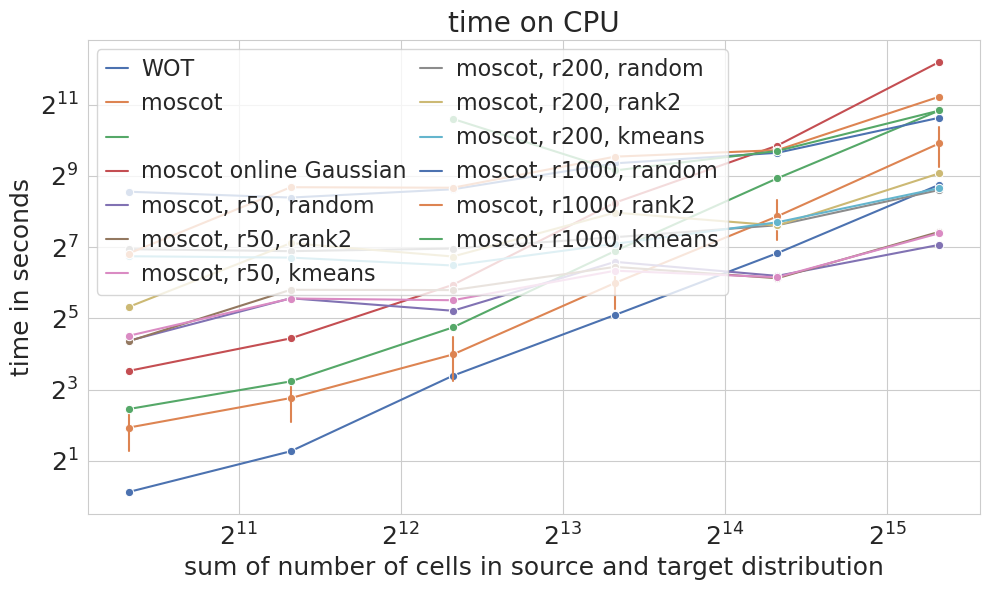

In [45]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
pl = sns.lineplot(x='n_cells', y='result.benchmark_result', hue="model_adapted", err_style="bars", marker='o',
                     data=d, ax=axs, palette=palette, markers=True)
plt.xscale('log', base=2)
plt.yscale('log', base=2)
handles, _labels = axs.get_legend_handles_labels()

labels = [*map(labels_dict.get, _labels)]

axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=2, loc='upper left', 
            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('time in seconds', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("time on CPU", fontsize=20)
_, xlabels = plt.xticks()




plt.tight_layout()
#if save_figure:
#    plt.savefig(FIG_DIR + f'/fig_2_b.jpg', dpi=300)
plt.show()

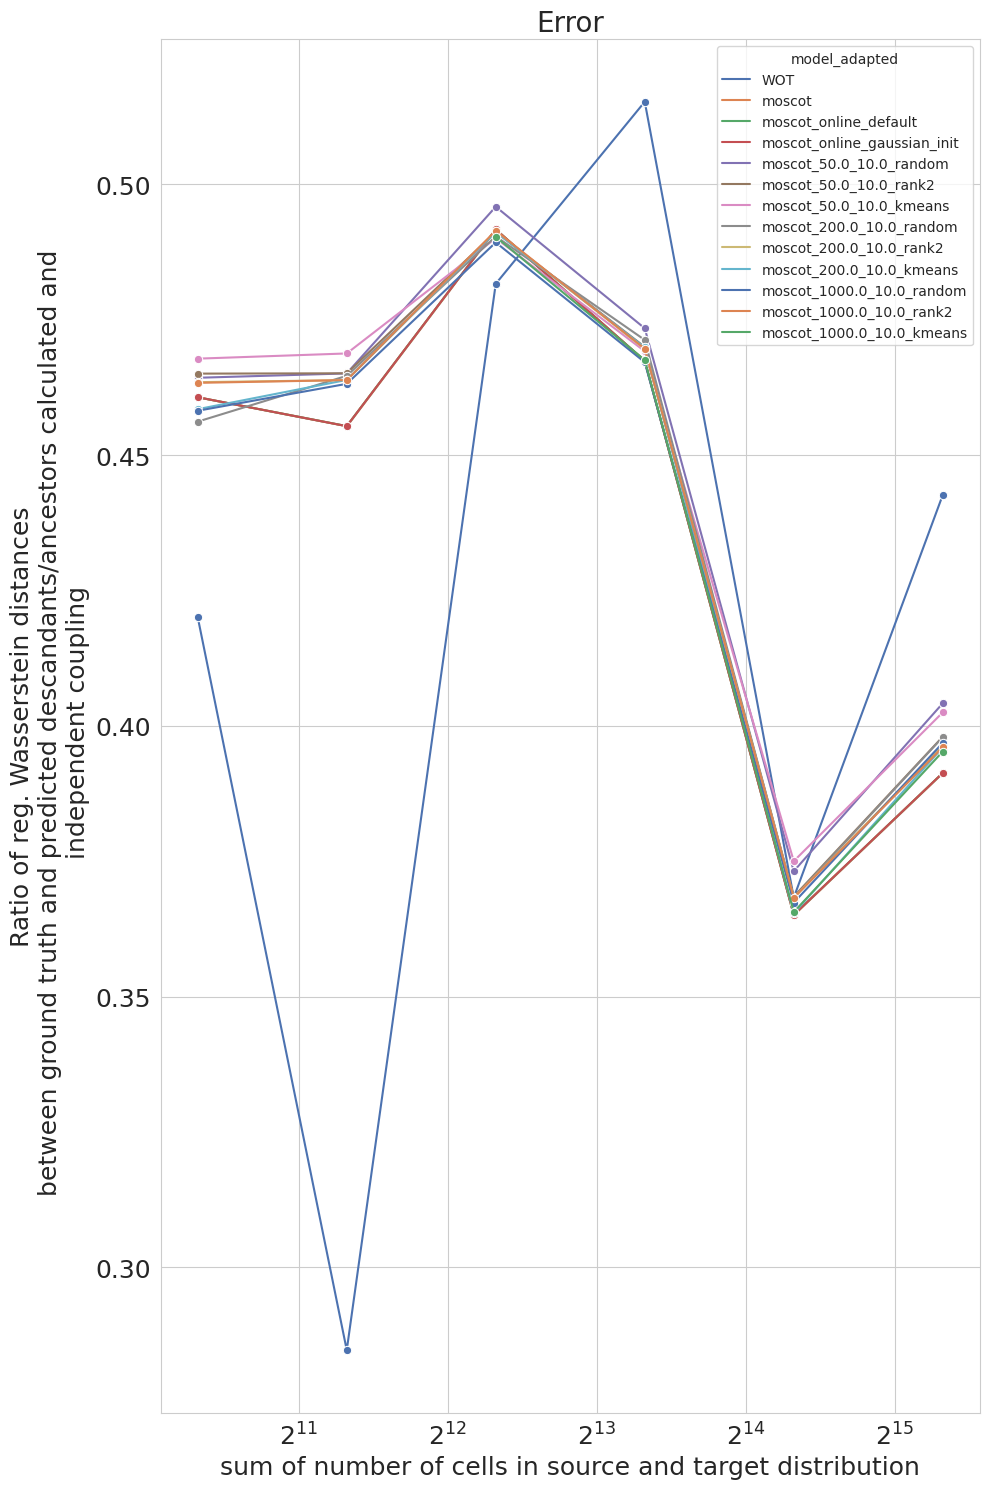

In [46]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)*2.5))
pl = sns.lineplot(x='n_cells', y='error_adapted', hue="model_adapted", marker='o', 
                     data=d, ax=axs, palette=palette, markers=True)
plt.xscale('log', base=2)
handles, _labels = axs.get_legend_handles_labels()

#labels = [*map(labels_dict.get, _labels)]

#axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
#            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('Ratio of reg. Wasserstein distances\n between ground truth and predicted descandants/ancestors calculated and\n independent coupling', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("Error", fontsize=20)
_, xlabels = plt.xticks()

#axs.text("Error: ratio of Wasserstein distances between ground truth and predictions obtained by the calculated OT map and predictions obtained by the independent coupling.")




plt.tight_layout()